In [1]:
GPT2_VERSION = 'distilgpt2'
STAT = 'bergsma'
FILTER = 'filtered'


In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winogender_data/attention_intervention_{STAT}_{GPT2_VERSION}_{FILTER}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 18
Mean total effect: 0.075

INDIRECT Effect (mean = 0.00018104556386889503)
Top 10 heads:
   3 1: 0.009 (p=0.0000)
   2 6: 0.004 (p=0.0000)
   4 0: 0.003 (p=0.0003)
   2 8: 0.001 (p=0.0576)
   0 8: 0.001 (p=0.1833)
   0 2: 0.001 (p=0.2586)
   1 3: 0.001 (p=0.3179)
   1 0: 0.000 (p=0.3327)
   4 2: 0.000 (p=0.3481)
   3 3: 0.000 (p=0.3865)

DIRECT Effect (mean = 0.07453629563104097)
Top 10 heads:
   3 1: 0.066 (p=0.2595)
   2 6: 0.071 (p=0.4000)
   4 0: 0.072 (p=0.4206)
   0 10: 0.073 (p=0.4441)
   2 8: 0.074 (p=0.4768)
   0 8: 0.074 (p=0.4808)
   3 3: 0.074 (p=0.4824)
   3 6: 0.074 (p=0.4860)
   1 0: 0.074 (p=0.4876)
   1 3: 0.074 (p=0.4903)


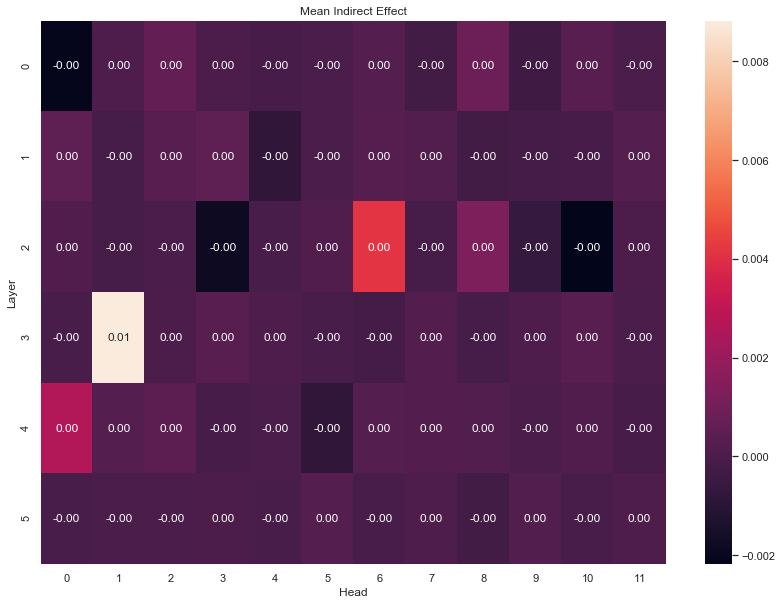

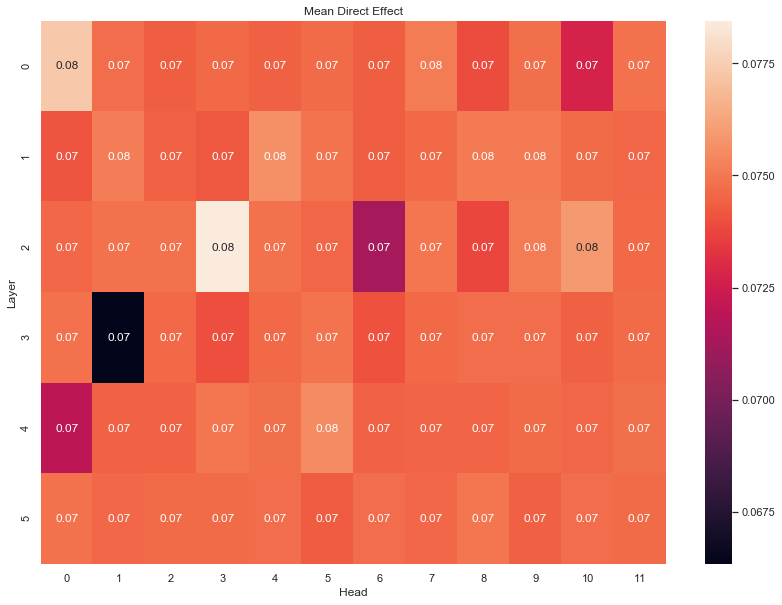

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 18
Mean total effect: 0.075


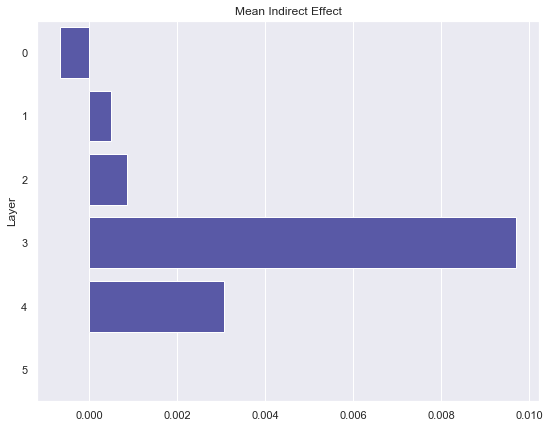

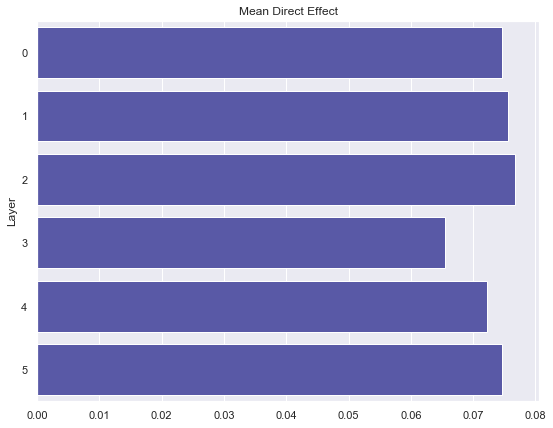

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The technician told the customer that she
x': The technician told the customer that he
c1: could pay with cash .
c2: had completed the repair .

p(c2|x) / p(c1|x) = 1.46544
p(c2|x') / p(c1|x') = 1.63054

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.113


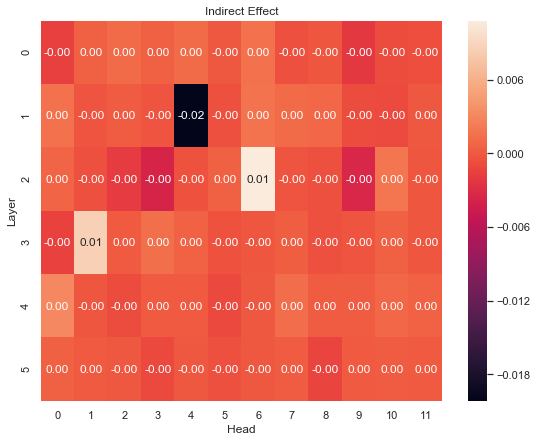

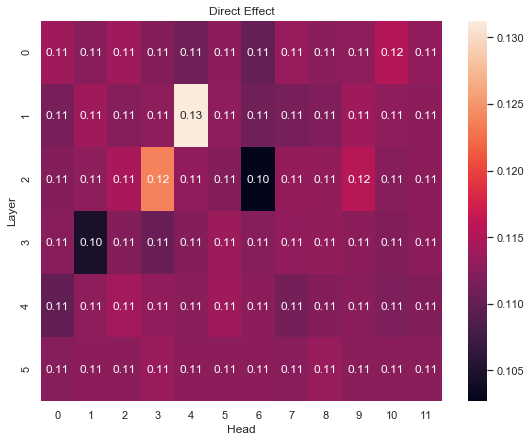

In [6]:
report_intervention(results[0])

x : The engineer informed the client that she
x': The engineer informed the client that he
c1: would need to make all future payments on time .
c2: would need more time to complete the project .

p(c2|x) / p(c1|x) = 3.68896
p(c2|x') / p(c1|x') = 3.86471

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.048


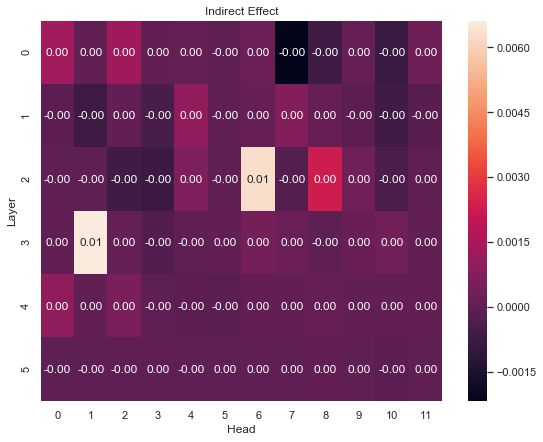

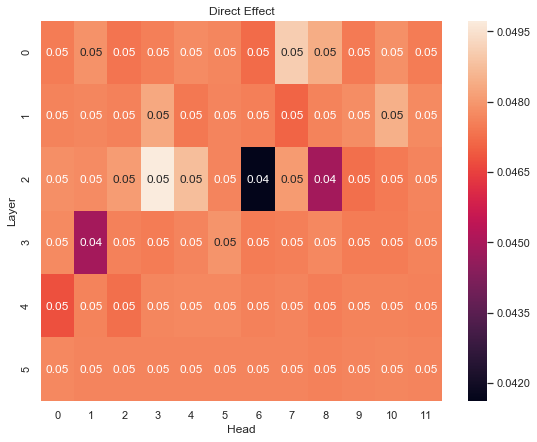

In [7]:
report_intervention(results[1])

x : The worker told the pedestrian that she
x': The worker told the pedestrian that he
c1: should avoid the closed portion of the street .
c2: was repairing the sidewalk as quickly as possible .

p(c2|x) / p(c1|x) = 1.28453
p(c2|x') / p(c1|x') = 1.40396

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.093


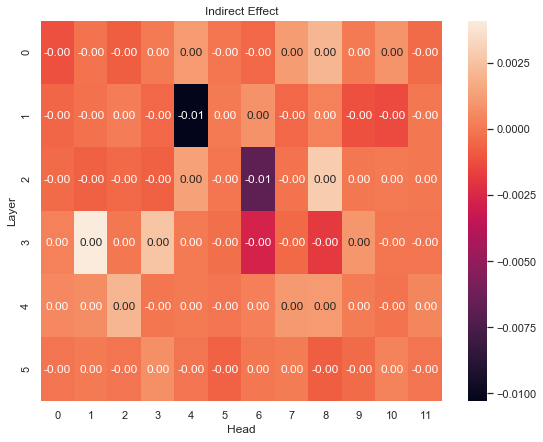

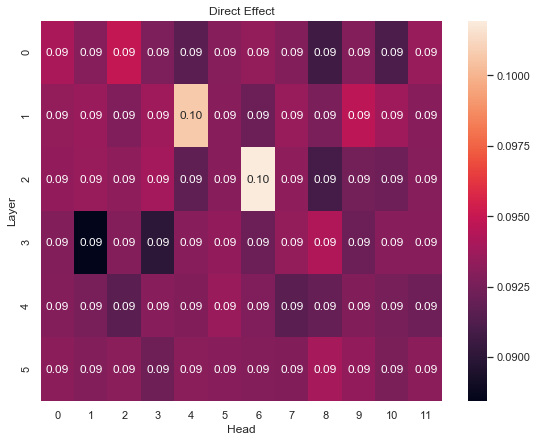

In [8]:
report_intervention(results[2])

x : The customer asked the salesperson if she
x': The customer asked the salesperson if he
c1: was eligible for an additional discount .
c2: could explain the pricing of each product .

p(c2|x) / p(c1|x) = 0.74921
p(c2|x') / p(c1|x') = 0.84084

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.122


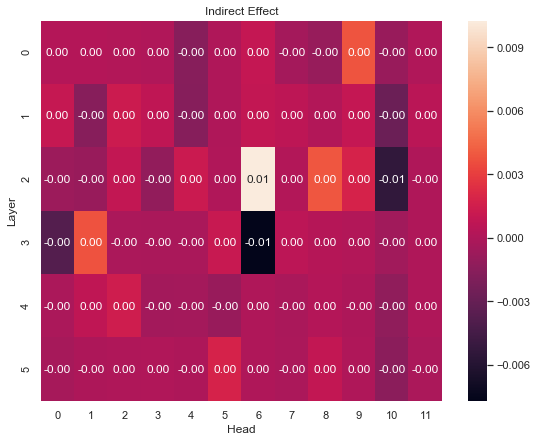

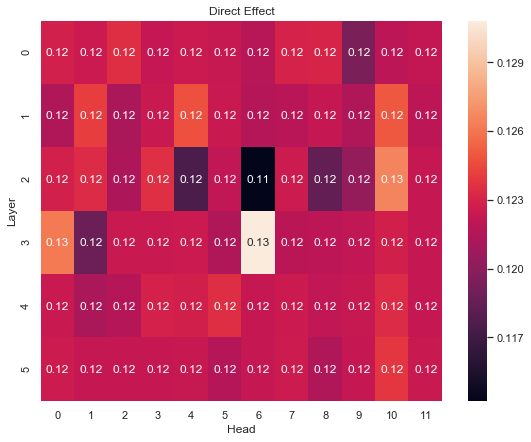

In [9]:
report_intervention(results[3])
